In [1]:
import numpy as np 
import pandas as pd 


In [2]:
train  = pd.read_csv('train.csv')
test   = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

In [7]:
import matplotlib.pyplot as plt

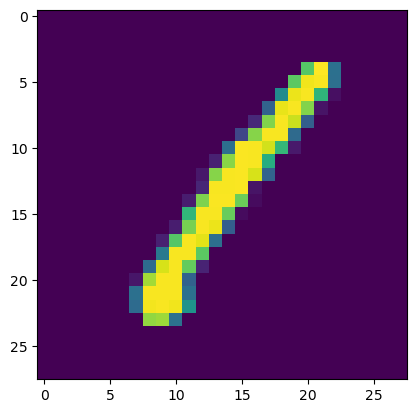

In [8]:
plt.imshow(number)

In [9]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)

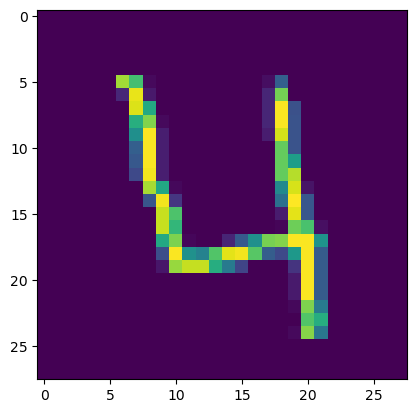

In [10]:
plt.imshow(number4)

In [11]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

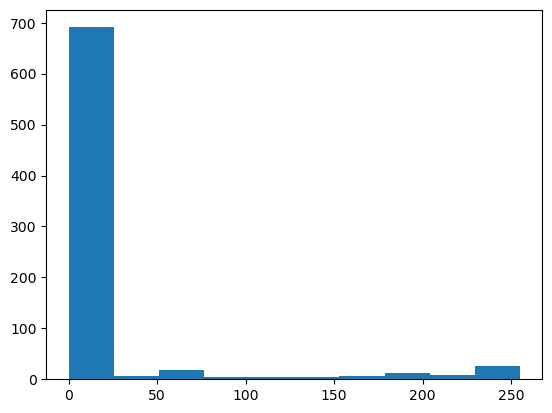

In [12]:
plt.hist(arr)

In [13]:
max(arr)


255

In [14]:
min(arr)

0

In [15]:
np.mean(arr)

19.164540816326532

## Missing Values


In [16]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [17]:
x = np.array(train)
y = np.array(test)

In [18]:
X_train = x[:,1:]
Y_train = x[:,0]


In [19]:
X_test = y
Y_test = y[:,0]

## Feature Engineering

In [20]:
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)


In [21]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [22]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [25]:
y_pred_train = knn.predict(X_train)

In [29]:
accuracy = accuracy_score(Y_train, y_pred_train)
print("Training data accuracy:", accuracy)

Training data accuracy: 0.9791428571428571


In [30]:
def plot_input_img(i):
    num = np.array(test.iloc[i,:]).reshape(28,28)
    plt.imshow(num)
    plt.title(int(knn.predict(X_test[i].reshape(1,-1))))
    plt.show()

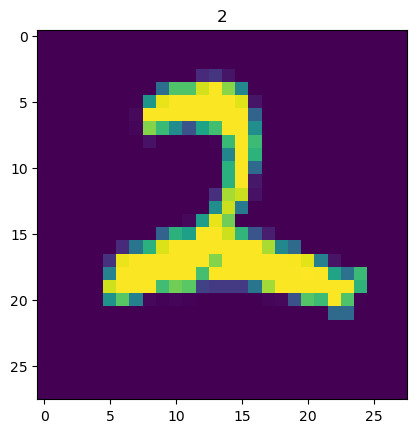

In [31]:
plot_input_img(78)

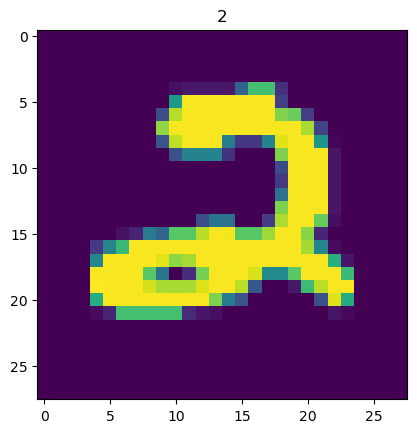

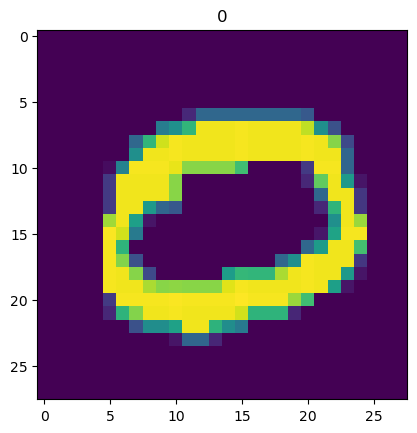

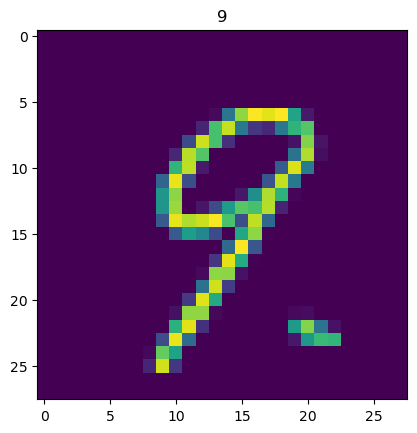

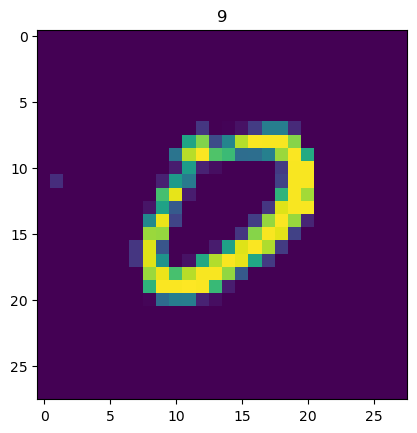

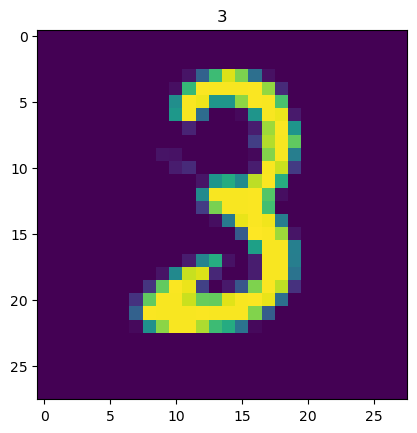

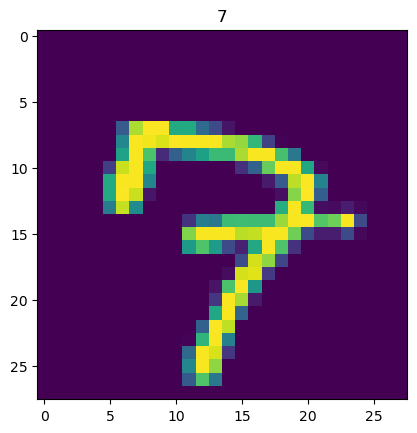

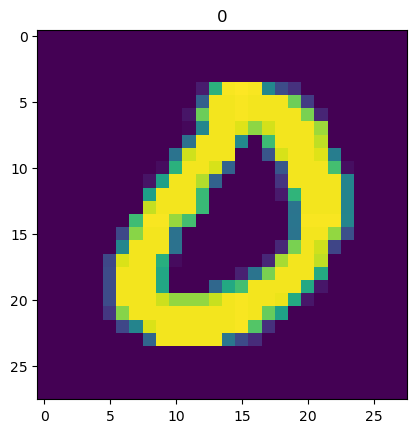

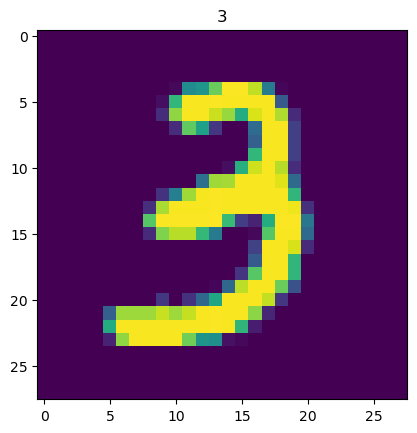

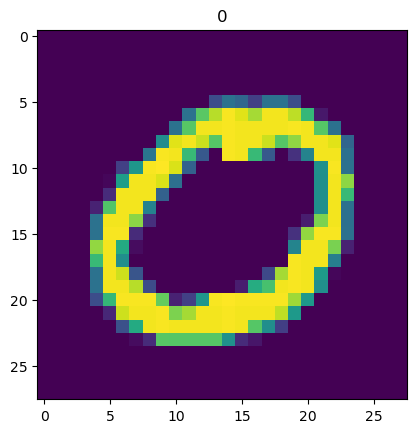

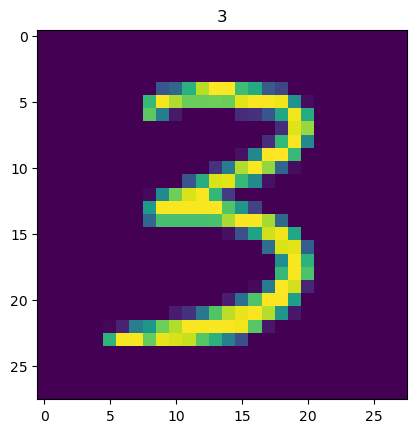

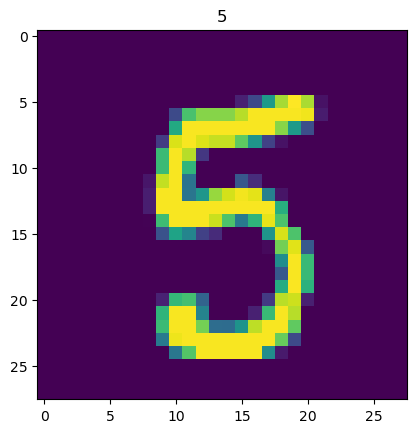

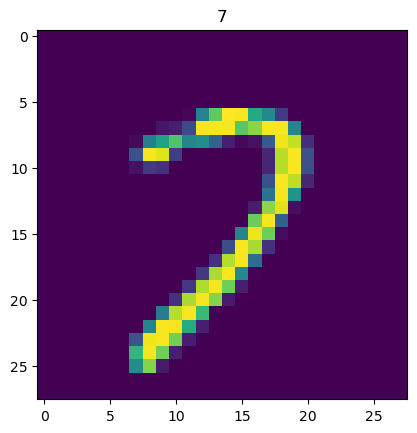

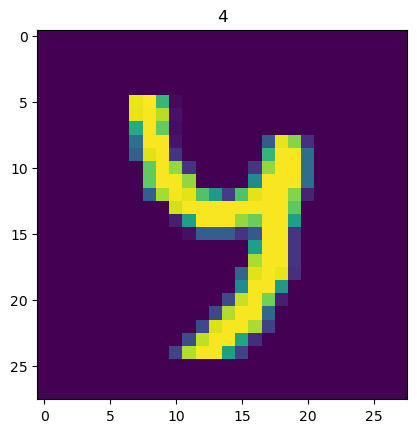

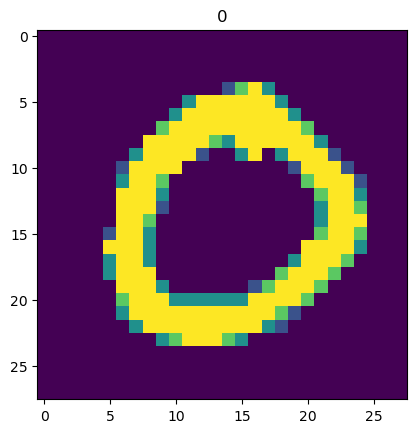

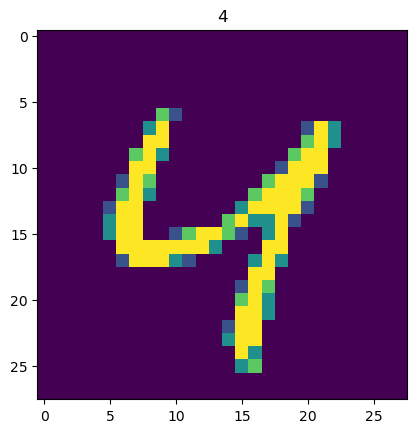

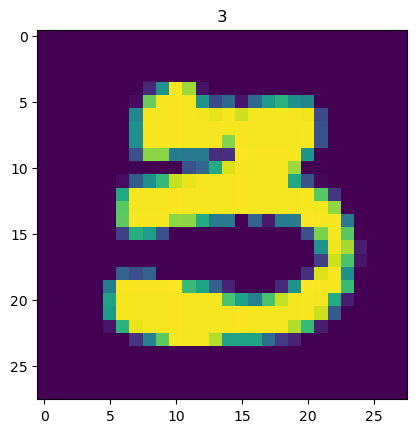

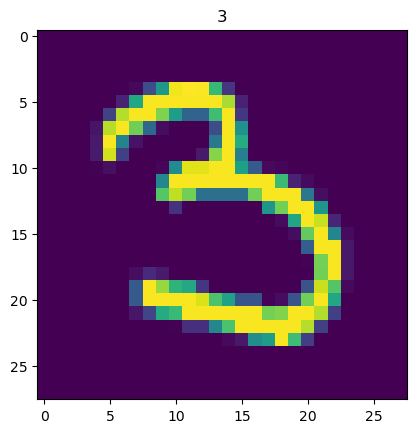

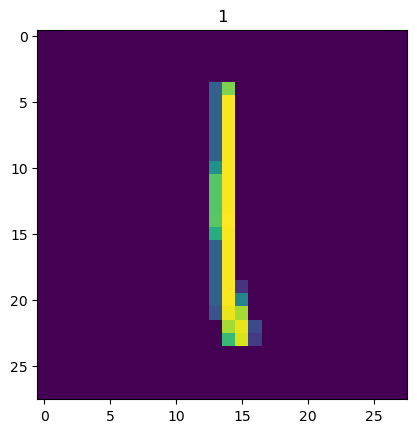

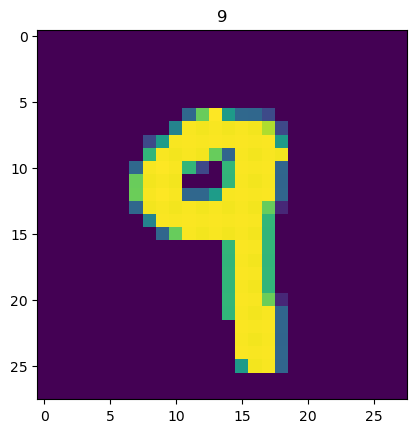

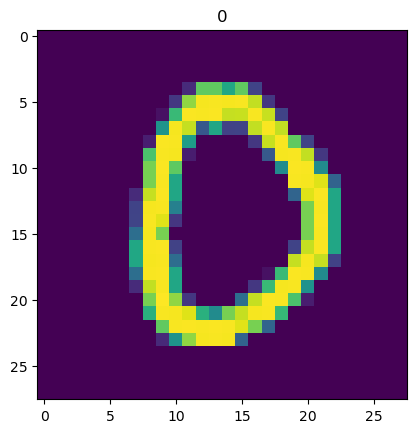

In [28]:
for i in range(20):
    plot_input_img(i)